# I have collected the viewers review from diffrenet websites for movie "SHOLAY" & tried to introduce Sentiment Analysis in my created text file

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sholay-movie-review/Sholay Movie_Sample Review_Data.txt


In [2]:
#importing data set of movie review
with open ("/kaggle/input/sholay-movie-review/Sholay Movie_Sample Review_Data.txt") as fh:
    Reviews  = [line.strip() for line in fh if line.strip()]

In [3]:
print("Reviews:\n",Reviews[:10])

Reviews:
 ["Among Bollywood's Best.", "What to say of this 'almost perfect Bollywood movie' and arguably among the greatest from the industry, it had absolutely everything in it, a blend of all the facets of Hindi cinema, yet modelled on the Western movies running in Hollywood at that time and before. No need to elaborate on any of the elements of this film, as any Hindi movie lover would know; but to mention just one, I would talk of the action sequences in the running train which were such perfectly shot that they seemed way ahead of its time. It had a slow opening in the theatres but gathered steam in the second week and o boy, it never looked back from there. I still remember it running as late as the 90s in some theatre or the other in the city and had a release every year whenever they found a slot for this classic. If the number of times a movie been watched by any viewer is the question, it would perhaps make the Guinness Books by now.", "15th August 1975. The day Ramesh Sippy'

# Identifying Sentiments from Reviews

In [4]:
from textblob import TextBlob
print('{:80}:{:25}:{:25}'.format("Reviews","Polarity","Subjectivity"))

Reviews                                                                         :Polarity                 :Subjectivity             


# Identifying Sentiments by Reviews

In [5]:
for review in Reviews:
    sentiment=TextBlob(review)
    print('{:80}: {:01.2f}: {:01.2f}'.format(review[:60],sentiment.polarity,sentiment.subjectivity))
    

Among Bollywood's Best.                                                         : 1.00: 0.30
What to say of this 'almost perfect Bollywood movie' and arg                    : 0.23: 0.50
15th August 1975. The day Ramesh Sippy's magnum opus Sholay                     : 0.00: 0.00
Undoubtedly, this film doesn't need a review. We all know Sh                    : 0.37: 0.57
I first experienced the Sholay phenomenon in the year 1985 d                    : 0.39: 0.73
I have seen the movie multiple times later on VHS (during vi                    : 0.00: 0.27
One of the best films of 1970s. Dharam and Amit were no doub                    : 0.65: 0.64
A master class with master performers in Dharamendra, Amitab                    : 0.44: 0.64
What to write about this movie wherein an actor who didn't u                    : 0.24: 0.45
THE GREATEST MOVIE EVER MADE IN INDIA.                                          : 1.00: 1.00
Best movie ever. Even Hollywood action movies lagging behind          

# Sentiments Summary

Final summarized counts : [26, 20, 12]

 Pie Representation 
-------------------


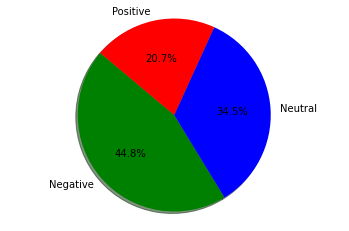

In [6]:
#Categorize polarity into positive, neutral or negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each review
for review in Reviews:
    sentiment = TextBlob(review)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Green","Blue","Red"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()